<a href="https://colab.research.google.com/github/Vijaykumar-HealthGIS/NLP/blob/main/Analysis_370.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving HeatMap_data_370.csv to HeatMap_data_370.csv
Data loaded. Showing first 5 rows:
   Latitude  Longitude  Sentiment  Segment  WC  Analytic  Clout  Authentic  \
0  11.93333   79.81667        0.0        1  38     92.70  70.59       8.42   
1  26.83928   80.92313        0.0        1  20     69.05    NaN       7.03   
2  20.00000   77.00000       -1.0        1  53     75.29  13.48      10.87   
3  29.51171   75.45515        0.0        1  20     69.05    NaN       7.03   
4  28.63576   77.22445       -1.0        1  52     89.52  88.42      44.14   

    Tone   WPS  ...  nonflu  filler  AllPunc  Period  Comma  QMark  Exclam  \
0  61.63  19.0  ...     0.0     0.0    28.95    2.63   5.26   0.00    7.89   
1    NaN  10.0  ...     0.0     0.0    40.00    5.00   0.00   5.00    0.00   
2  20.23  53.0  ...     0.0     0.0    22.64    7.55   5.66   0.00    0.00   
3    NaN  10.0  ...     0.0     0.0    40.00    5.00   0.00   5.00    0.00   
4  20.23  13.0  ...     0.0     0.0    17.31    7.69  

AttributeError: Stamen

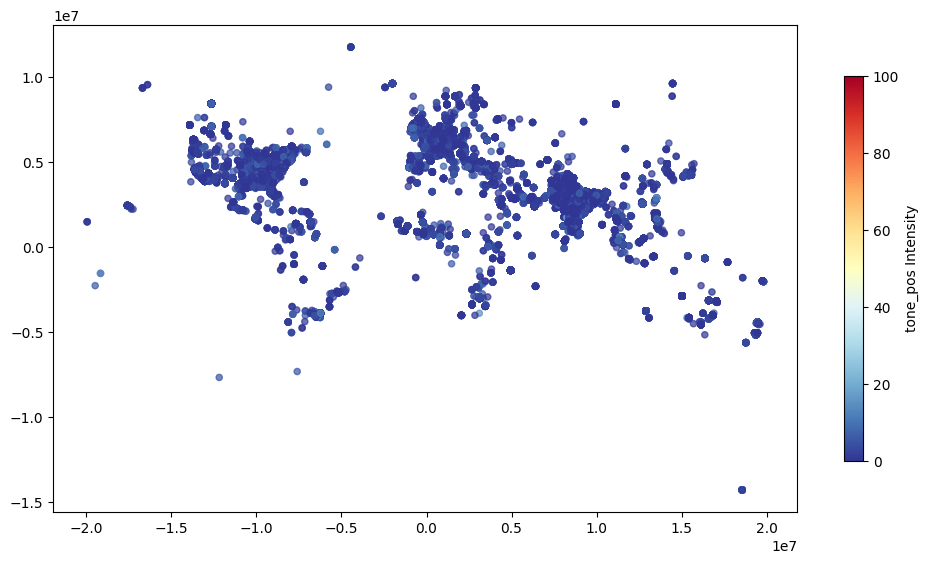

In [2]:
# Install required packages (only run once)
!pip install geopandas matplotlib contextily

# Step 1: Upload CSV File from Your Computer
from google.colab import files
uploaded = files.upload()

# Step 2: Load the file into a DataFrame
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 3: Check and clean the data
print("Data loaded. Showing first 5 rows:")
print(df.head())

# Ensure required columns exist
required_cols = ['Latitude', 'Longitude']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

# Drop rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Step 4: Convert to GeoDataFrame
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')
gdf = gdf.to_crs(epsg=3857)  # Web Mercator projection

# Step 5: Choose sentiment variables to map
sentiment_vars = ['tone_pos', 'tone_neg', 'emo_anger', 'emo_sad', 'emo_anx', 'moral', 'politic']

# Step 6: Plot and save heat/cold maps
import matplotlib.pyplot as plt
import contextily as ctx

for var in sentiment_vars:
    if var not in gdf.columns:
        print(f"Skipping {var} — not found in data.")
        continue

    fig, ax = plt.subplots(figsize=(12, 10))

    gdf.plot(
        ax=ax,
        column=var,
        cmap='RdYlBu_r',   # Red (hot) to Blue (cold)
        markersize=20,
        alpha=0.7,
        legend=True,
        legend_kwds={'label': f"{var} Intensity", 'shrink': 0.5}
    )

    # Add basemap
    ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

    # Add north arrow
    ax.annotate('N', xy=(0.95, 0.95), xycoords='axes fraction', fontsize=18,
                ha='center', va='center', fontweight='bold',
                arrowprops=dict(facecolor='black', arrowstyle='-|>', lw=1.5))

    ax.set_title(f"Heat/Cold Map of {var}", fontsize=15)
    ax.set_axis_off()

    # Save high-quality maps
    tiff_file = f"{var}_heatmap.tiff"
    jpg_file = f"{var}_heatmap.jpg"
    plt.savefig(tiff_file, dpi=300, bbox_inches='tight')
    plt.savefig(jpg_file, dpi=300, bbox_inches='tight')
    plt.close()

    print(f"Maps saved: {tiff_file}, {jpg_file}")

In [3]:
# Install necessary libraries (run only once in Google Colab)
!pip install geopandas matplotlib contextily

# Step 1: Upload CSV from your computer
from google.colab import files
uploaded = files.upload()

# Step 2: Load CSV file
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Extract filename and read
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 3: Drop rows without coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Step 4: Convert to GeoDataFrame
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')
gdf = gdf.to_crs(epsg=3857)  # Convert to Web Mercator for mapping

# Step 5: Identify sentiment variables (ignore non-numeric or unwanted columns)
non_vars = ['Latitude', 'Longitude', 'geometry', 'Segment', 'English_Translation', 'Message']
sentiment_vars = [col for col in gdf.columns if col not in non_vars and pd.api.types.is_numeric_dtype(gdf[col])]

print(f"\n📊 Found {len(sentiment_vars)} sentiment variables to plot.")

# Step 6: Plot and export heatmaps for all variables
for var in sentiment_vars:
    print(f"📍 Generating map for: {var}")
    try:
        fig, ax = plt.subplots(figsize=(12, 10))

        # Plot points with color intensity
        gdf.plot(
            ax=ax,
            column=var,
            cmap='RdYlBu_r',  # Red (hot) to Blue (cold)
            markersize=20,
            alpha=0.75,
            legend=True,
            legend_kwds={'label': f"{var} Intensity", 'shrink': 0.5}
        )

        # Add working basemap
        ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

        # Add north arrow manually
        ax.annotate('N', xy=(0.96, 0.93), xycoords='axes fraction', fontsize=16,
                    ha='center', va='center', fontweight='bold',
                    arrowprops=dict(facecolor='black', arrowstyle='-|>', lw=1.5))

        ax.set_title(f"Heat/Cold Map of {var}", fontsize=16)
        ax.set_axis_off()

        # Export TIFF and JPG
        fig.savefig(f"{var}_heatmap.tiff", dpi=300, bbox_inches='tight')
        fig.savefig(f"{var}_heatmap.jpg", dpi=300, bbox_inches='tight')
        plt.close()
        print(f"✅ Exported: {var}_heatmap.tiff and .jpg")

    except Exception as e:
        print(f"❌ Skipping {var} due to error: {e}")


Saving HeatMap_data_370.csv to HeatMap_data_370 (1).csv

📊 Found 119 sentiment variables to plot.
📍 Generating map for: Sentiment
✅ Exported: Sentiment_heatmap.tiff and .jpg
📍 Generating map for: WC
✅ Exported: WC_heatmap.tiff and .jpg
📍 Generating map for: Analytic
✅ Exported: Analytic_heatmap.tiff and .jpg
📍 Generating map for: Clout
✅ Exported: Clout_heatmap.tiff and .jpg
📍 Generating map for: Authentic
✅ Exported: Authentic_heatmap.tiff and .jpg
📍 Generating map for: Tone
✅ Exported: Tone_heatmap.tiff and .jpg
📍 Generating map for: WPS
✅ Exported: WPS_heatmap.tiff and .jpg
📍 Generating map for: BigWords
✅ Exported: BigWords_heatmap.tiff and .jpg
📍 Generating map for: Dic
✅ Exported: Dic_heatmap.tiff and .jpg
📍 Generating map for: Linguistic
✅ Exported: Linguistic_heatmap.tiff and .jpg
📍 Generating map for: function
✅ Exported: function_heatmap.tiff and .jpg
📍 Generating map for: pronoun
✅ Exported: pronoun_heatmap.tiff and .jpg
📍 Generating map for: ppron
✅ Exported: ppron_heatmap.

In [ ]:
# Install necessary libraries (only once)
!pip install geopandas matplotlib contextily

# Step 1: Upload CSV from your computer
from google.colab import files
uploaded = files.upload()

# Step 2: Load required libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Step 3: Load the file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 4: Drop rows without coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Step 5: Convert to GeoDataFrame and project to Web Mercator
df['geometry'] = df.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326').to_crs(epsg=3857)

# Step 6: Identify sentiment variables (exclude non-numerics and irrelevant columns)
non_vars = ['Latitude', 'Longitude', 'geometry', 'Segment', 'English_Translation', 'Message']
sentiment_vars = [col for col in gdf.columns if col not in non_vars and pd.api.types.is_numeric_dtype(gdf[col])]

print(f"\n📊 Found {len(sentiment_vars)} sentiment variables to map.")

# Step 7: Plot and export heatmaps
for var in sentiment_vars:
    print(f"📍 Generating map for: {var}")
    try:
        fig, ax = plt.subplots(figsize=(12, 10))

        # Clean label for legend
        legend_label = var.replace('_', ' ').title()

        # Plot points with color intensity
        gdf.plot(
            ax=ax,
            column=var,
            cmap='RdYlBu_r',
            markersize=20,
            alpha=0.75,
            legend=True,
            legend_kwds={'label': legend_label, 'shrink': 0.5}
        )

        # Add clear, high-quality basemap
        ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

        # Add north arrow
        ax.annotate('N', xy=(0.96, 0.93), xycoords='axes fraction', fontsize=16,
                    ha='center', va='center', fontweight='bold',
                    arrowprops=dict(facecolor='black', arrowstyle='-|>', lw=1.5))

        # Remove axis and title (clean map)
        ax.set_axis_off()

        # Save TIFF and JPG
        fig.savefig(f"{var}_heatmap.tiff", dpi=300, bbox_inches='tight')
        fig.savefig(f"{var}_heatmap.jpg", dpi=300, bbox_inches='tight')
        plt.close()
        print(f"✅ Exported: {var}_heatmap.tiff and .jpg")

    except Exception as e:
        print(f"❌ Skipping {var} due to error: {e}")
